In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import warnings
import warnings
warnings.filterwarnings('ignore')

#Check scikit-learn version
import sklearn
print('Sklearn_version:',sklearn.__version__)

Sklearn_version: 0.19.1


In [2]:
#To Display all the columns
pd.set_option('display.max_columns',None)

In [3]:
#Loading the datasets
df = pd.read_csv('ElectionData.csv',parse_dates=['time'])
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


Attribute Information:

    1-TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    2-time (timestamp): Date and time of the data acquisition
    3-territoryName (string): Short name of the location (district or nation-wide)
    4-totalMandates (numeric): MP's elected at the moment
    5-availableMandates (numeric): MP's left to elect at the moment
    6-numParishes (numeric): Total number of parishes in this location
    7-numParishesApproved (numeric): Number of parishes approved in this location
    8-blankVotes (numeric): Number of blank votes
    9-blankVotesPercentage (numeric): Percentage of blank votes
    10-nullVotes (numeric): Number of null votes
    11-nullVotesPercentage (numeric): Percentage of null votes
    12-votersPercentage (numeric): Percentage of voters
    13-subscribedVoters (numeric): Number of subscribed voters in the location
    14-totalVoters (numeric): Percentage of blank votes
    15-pre.blankVotes (numeric): Number of blank votes (previous election)
    16-pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    17-pre.nullVotes (numeric): Number of null votes (previous election)
    18-pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    19-pre.votersPercentage (numeric): Percentage of voters (previous election)
    20-pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    21-pre.totalVoters (numeric): Percentage of blank votes (previous election)
    22-Party (string): Political Party
    23-Mandates (numeric): MP's elected at the moment for the party in a given district
    24-Percentage (numeric): Percentage of votes in a party
    25-validVotesPercentage (numeric): Percentage of valid votes in a party
    26-Votes (numeric): Percentage of party votes
    27-Hondt (numeric): Number of MP's according to the distribution of votes now
    28-FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [4]:
#Checking the shape of the dataset
df.shape

(21643, 28)

Observation:

    The dataset consist of 21643 rows and 28 columns.

In [5]:
#Show all of the columns
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [6]:
#Checking the data type of columns
df.dtypes

TimeElapsed                          int64
time                        datetime64[ns]
territoryName                       object
totalMandates                        int64
availableMandates                    int64
numParishes                          int64
numParishesApproved                  int64
blankVotes                           int64
blankVotesPercentage               float64
nullVotes                            int64
nullVotesPercentage                float64
votersPercentage                   float64
subscribedVoters                     int64
totalVoters                          int64
pre.blankVotes                       int64
pre.blankVotesPercentage           float64
pre.nullVotes                        int64
pre.nullVotesPercentage            float64
pre.votersPercentage               float64
pre.subscribedVoters                 int64
pre.totalVoters                      int64
Party                               object
Mandates                             int64
Percentage 

In [7]:
#Seeing the information of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null datetime64[ns]
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-nu

Observation:

    1-The data type consist of three type of datatypes, categorical, numeric and datetime.

    2-All the columns are numeric except two columns that is time which is in datetime datatype and territoryName, party 
      which is object data types.
        
    3-The information shows that there is no null values in our dataset.

## To check the missing values

In [8]:
#Checking the missing values in data set
df.isnull().values.any()

False

In [9]:
#Checking the missing values in data set
df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

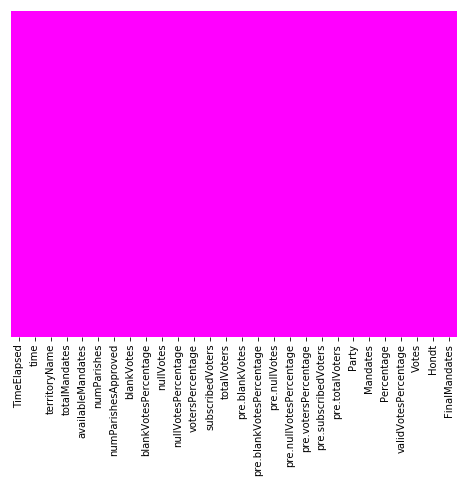

In [10]:
#Seeing the null values via visualization
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='spring')
plt.show()

Observation:
    
    There is no null values in our dataset.

## Summary Statistics

In [11]:
#Summary of the dataset.
df.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


Observation:
    
    1-There are 226 total candidates.
    2-Total number of Parishes are 3092 in this location and all are approved for this location.
    3-The maximum number of blank votes are 129599 and their percentage is 5.5.
    4-The maximum number of null votes are 88539 and their percentage is 3.35.
    5-The voters percentage in this election is approx 60%.
    6-The maximum number of blank votes in previous election is 112666 and their percentage is 3.36. So, as compare to 
      previous election the blank votes percentage is higher in 2019 election.
    7-The maximum number of null votes in previous election is 86473 and their percentage is 3.12. So, as compare to 
      previous election the null votes percentage is higher in 2019 election.
    8-The voters percentage in previous election is approx 63%.
    9-Most of the columns is right skewed due to mean greater than median.
    10-Some of the columns is left skewed due to median greater than mean.
    11-The difference between 75% and maximum is higher in most of the columns thats why outliers are present which need
       to be removed.
    
Findings:
    
    As compare to previous election the voter percentage is low in 2019 election and also number of blank vote percentage 
    and null vote percentage is higher in this election.

In [12]:
#Printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].value_counts())
        print('******************************************************************************')  

territoryName : 21
Leiria                 1134
Braga                  1134
Porto                  1134
Território Nacional    1134
Viana do Castelo       1080
Madeira                1080
Setúbal                1080
Viseu                  1080
Aveiro                 1080
Coimbra                1080
Lisboa                 1080
Guarda                 1026
Santarém               1026
Faro                   1026
Évora                  1026
Bragança                972
Castelo Branco          972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64
******************************************************************************
Party : 21
CDS-PP       1127
CH           1127
PS           1127
PDR          1127
B.E.         1127
PPD/PSD      1127
L            1127
PNR          1127
PCP-PEV      1127
PAN          1127
A            1127
IL           1127
PCTP/MRPP    1127
PPM          1073
R.I.R.       1026

In [13]:
#Printing the numeric columns and their unique values

print('*********Float64 columns unique values*********************')
print('\n')
for column in df.columns:
    if df[column].dtypes == np.number:
        print(str(column)+ ' : ' +str(df[column].nunique()))
        print('*****************************')
print('\n')
print('*********Int64 columns unique values*********************')
print('\n')
for column in df.columns:
    if df[column].dtypes == 'int64':
        print(str(column)+ ' : ' +str(df[column].nunique()))
        print('*****************************')

*********Float64 columns unique values*********************


blankVotesPercentage : 146
*****************************
nullVotesPercentage : 107
*****************************
votersPercentage : 282
*****************************
pre.blankVotesPercentage : 130
*****************************
pre.nullVotesPercentage : 90
*****************************
pre.votersPercentage : 278
*****************************
Percentage : 1363
*****************************
validVotesPercentage : 1387
*****************************


*********Int64 columns unique values*********************


TimeElapsed : 54
*****************************
totalMandates : 62
*****************************
availableMandates : 69
*****************************
numParishes : 20
*****************************
numParishesApproved : 219
*****************************
blankVotes : 329
*****************************
nullVotes : 331
*****************************
subscribedVoters : 335
*****************************
totalVoters : 336
***********

## To Check the correlation

In [14]:
df_cor=df.corr()
df_cor

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
TimeElapsed,1.000000,0.260377,-0.261627,-0.001944,0.100432,0.192350,0.034343,0.185784,-0.225021,0.029698,0.195487,0.198243,0.195734,0.093739,0.189902,-0.106054,0.054761,0.193160,0.196667,0.090190,0.000767,0.000526,0.082417,-0.001100,-0.001007
totalMandates,0.260377,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,0.973357,0.034774,0.969992,-0.132143,0.151927,0.972976,0.975404,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,-0.261627,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,0.383877,-0.008966,0.399074,-0.044174,0.080524,0.391272,0.383089,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,-0.001944,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,0.856779,0.036461,0.864837,-0.058017,0.026407,0.860782,0.853779,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.100432,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,0.947190,0.050378,0.951899,-0.073301,0.042180,0.949110,0.943147,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.192350,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,0.999657,0.072183,0.997490,-0.150275,0.161642,0.998487,0.998178,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,0.034343,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,0.030061,0.959142,-0.006067,-0.307544,-0.105314,0.002821,-0.000069,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.185784,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,0.998883,0.041317,0.999298,-0.125639,0.154965,0.999296,0.998706,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.225021,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,-0.152234,0.100924,-0.141809,0.497749,-0.233688,-0.153891,-0.159566,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.029698,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.181595,-0.144312,0.170285,-0.278275,0.909825,0.172542,0.186834,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

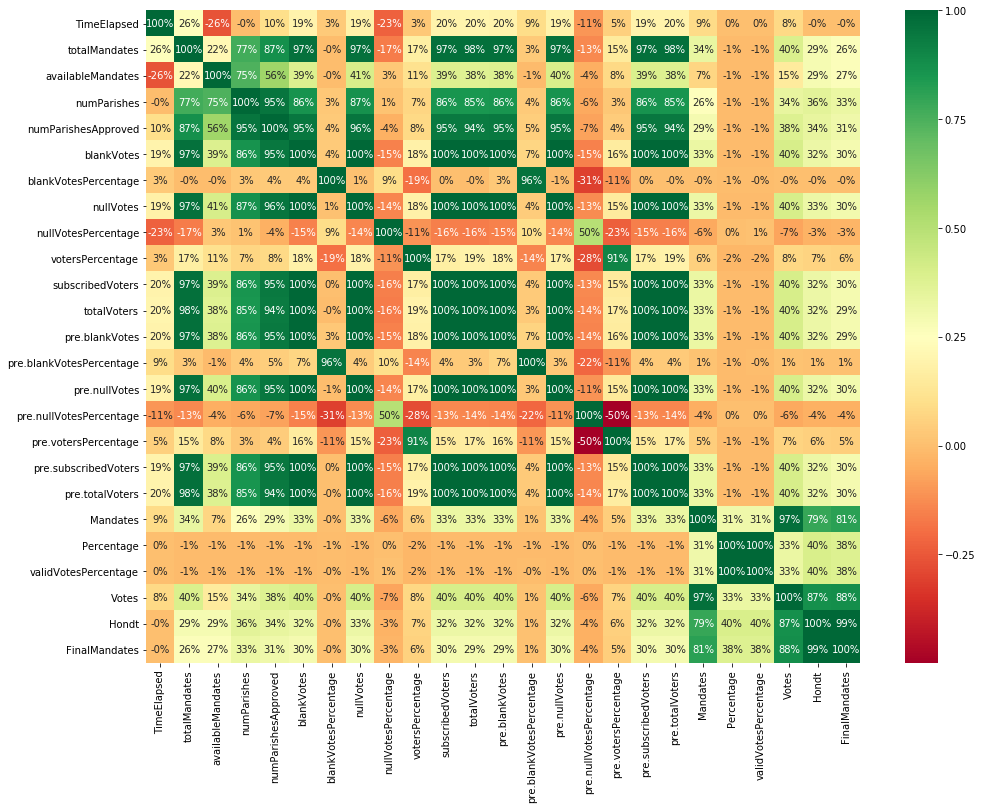

In [15]:
#Seeing correlation via heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='RdYlGn')
plt.show()

Observation:
    
    1-Some of the columns are highly correlated with each others.
    
    2-totalMandates, numParishes, numParishesApproved, blankVotes, nullVotes, subscribedVoters, totalVoters,
      pre.blankVotes, prenullVotes, pre.subscribedVoters, pre.totalVoters is highly correlated columns.
        
    3-pre.nullVotesPercentage, pre.VotersPercentage, pre.blankVotesPercentage,Percentage columns is less correlated or
     negatively correlated so we can drop these columns.

# Visualization

Text(0.5,1,'Correlation with target Variable')

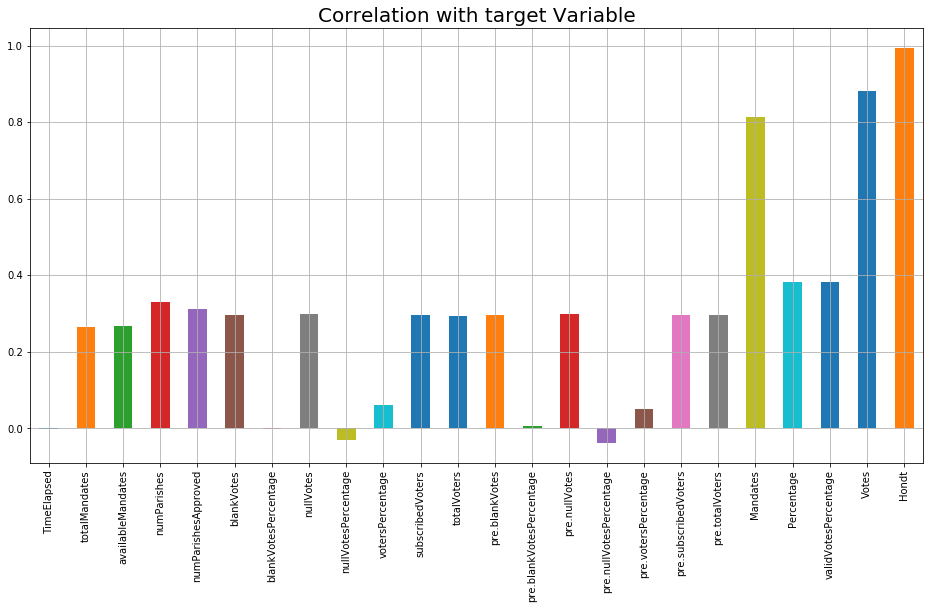

In [16]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('FinalMandates', axis=1).corrwith(df['FinalMandates']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)

Observation:
    
    Here we see the correlation with our target variable that is FinalMandates. All the columns is correlated with the 
    target columns except few of the columns.

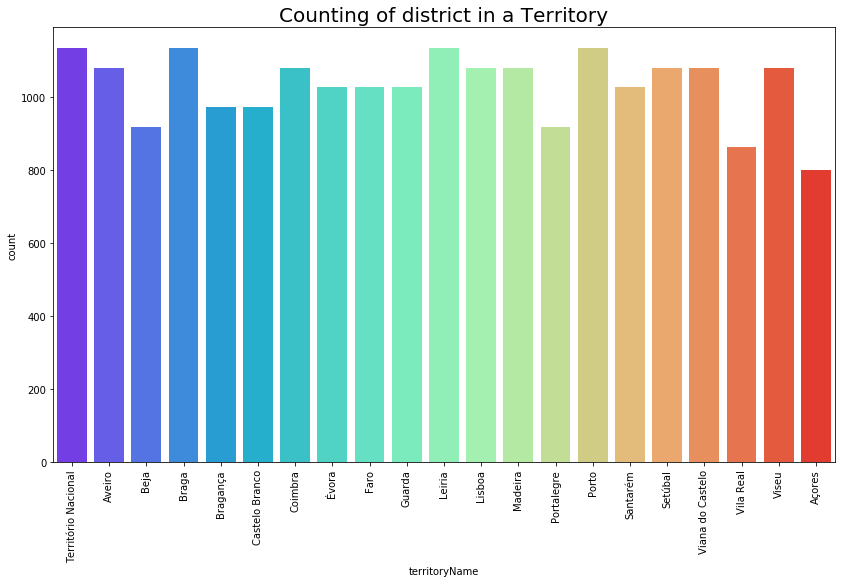

Leiria                 1134
Braga                  1134
Porto                  1134
Território Nacional    1134
Viana do Castelo       1080
Madeira                1080
Setúbal                1080
Viseu                  1080
Aveiro                 1080
Coimbra                1080
Lisboa                 1080
Guarda                 1026
Santarém               1026
Faro                   1026
Évora                  1026
Bragança                972
Castelo Branco          972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64


In [17]:
#Checking the number of district in a territory.
plt.figure(figsize=(14,8))
sns.countplot(df['territoryName'],palette= 'rainbow')
plt.title("Counting of district in a Territory",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df.territoryName.value_counts())

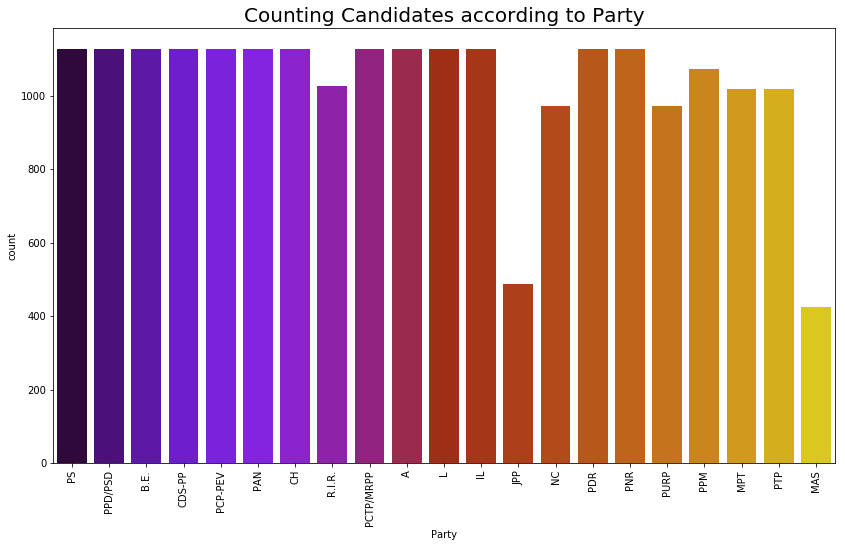

CDS-PP       1127
CH           1127
PS           1127
PDR          1127
B.E.         1127
PPD/PSD      1127
L            1127
PNR          1127
PCP-PEV      1127
PAN          1127
A            1127
IL           1127
PCTP/MRPP    1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64


In [18]:
#Checking the number of candidates of a party.
plt.figure(figsize=(14,8))
sns.countplot(df['Party'],palette= 'gnuplot')
plt.title("Counting Candidates according to Party",fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df.Party.value_counts())

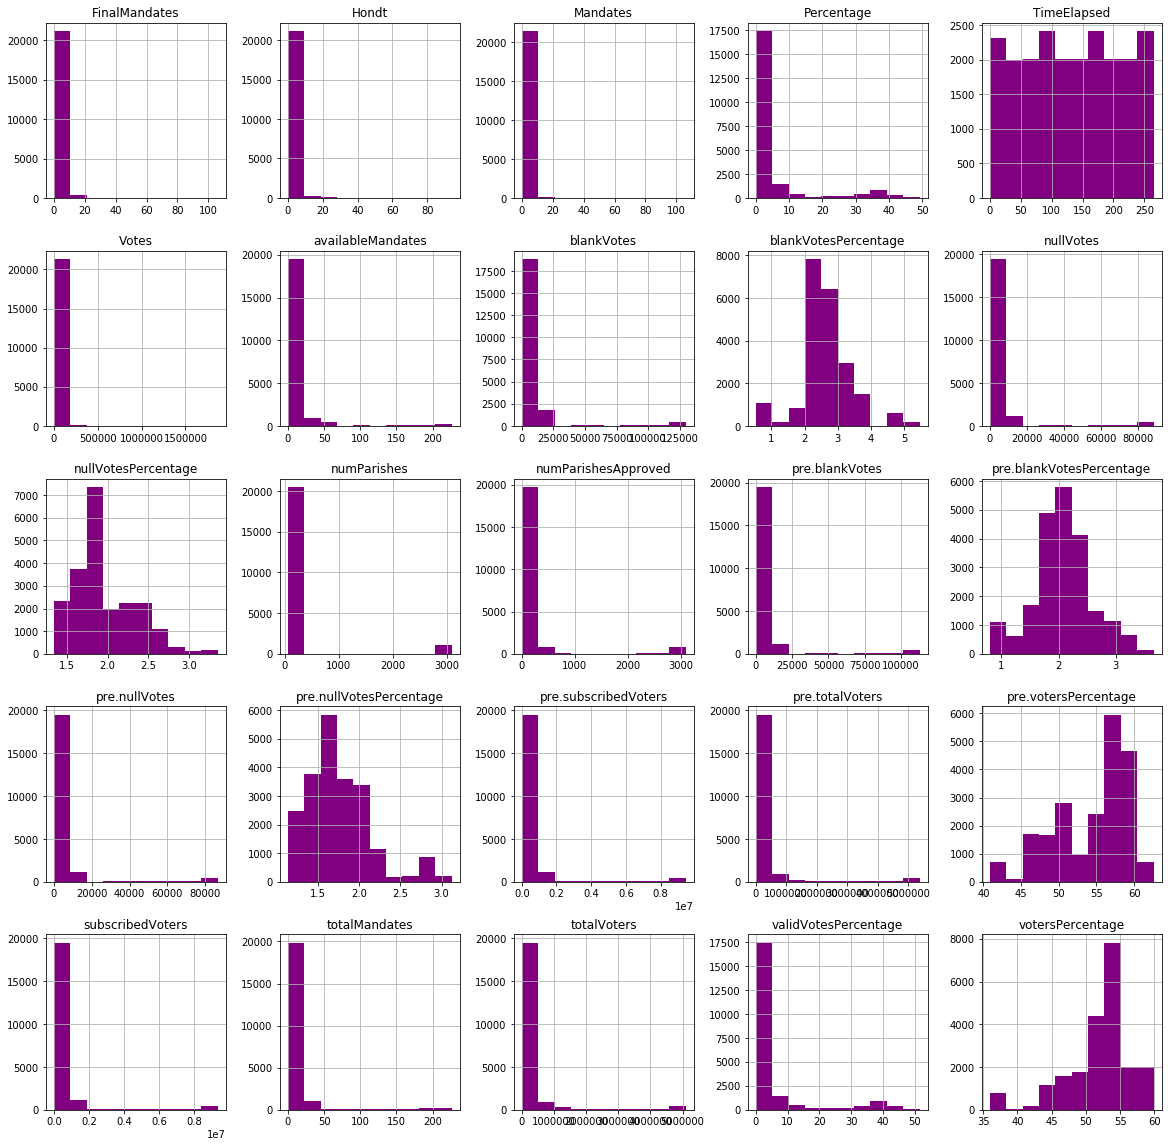

In [19]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='purple')
plt.show()

Observation:
     
        From the above diagram it is clearly shown that maximum number of columns are right skewed and only few of the
        columns are left skewed.

### Checking the Votes of 2019 Election

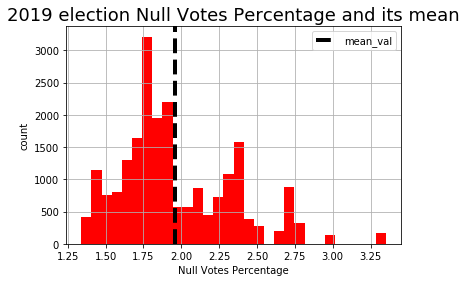

In [20]:
#Checking the Distribution of Null Votes Percentage and its mean

null_votes = df['nullVotesPercentage'].hist(bins=30, color='red')
mean_val = np.mean(df['nullVotesPercentage'])
plt.axvline(mean_val,linewidth=4,  color='black', label='mean_val',linestyle='dashed')
plt.title('2019 election Null Votes Percentage and its mean',fontsize=18)
plt.xlabel('Null Votes Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

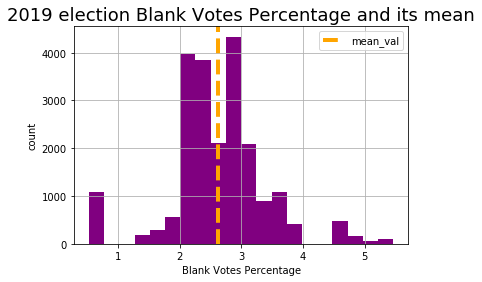

In [21]:
#Checking the Distribution of Blank Votes Percentage and its mean

null_votes = df['blankVotesPercentage'].hist(bins=20, color='purple')
mean_val = np.mean(df['blankVotesPercentage'])
plt.axvline(mean_val,linewidth=4,  color='orange', label='mean_val',linestyle='dashed')
plt.title('2019 election Blank Votes Percentage and its mean',fontsize=18)
plt.xlabel('Blank Votes Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

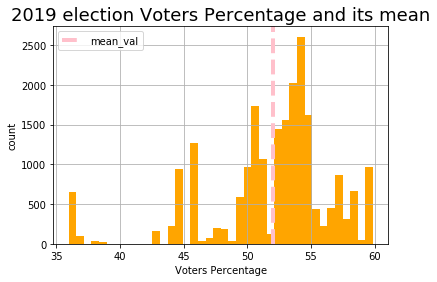

In [22]:
#Checking the Distribution of Voters Percentage and its mean

null_votes = df['votersPercentage'].hist(bins=40, color='orange')
mean_val = np.mean(df['votersPercentage'])
plt.axvline(mean_val,linewidth=4,  color='pink', label='mean_val',linestyle='dashed')
plt.title('2019 election Voters Percentage and its mean',fontsize=18)
plt.xlabel('Voters Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

### Checking the Votes of Previous Election

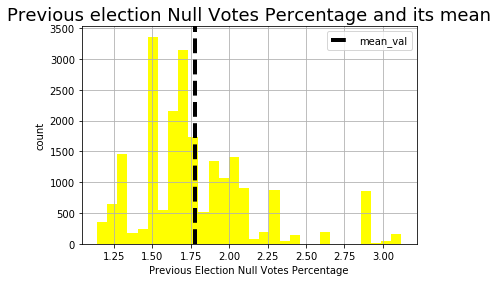

In [23]:
#Checking the Distribution of Previous election Null Votes Percentage and its mean

null_votes = df['pre.nullVotesPercentage'].hist(bins=30, color='yellow')
mean_val = np.mean(df['pre.nullVotesPercentage'])
plt.axvline(mean_val,linewidth=4,  color='black', label='mean_val',linestyle='dashed')
plt.title('Previous election Null Votes Percentage and its mean',fontsize=18)
plt.xlabel('Previous Election Null Votes Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

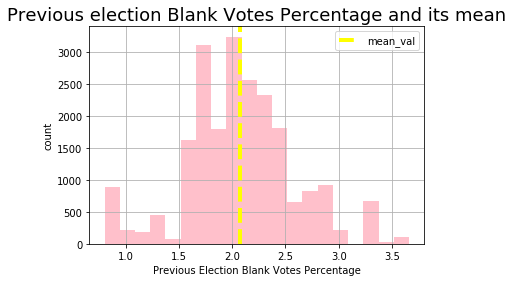

In [24]:
#Checking the Distribution of previous election Blank Votes Percentage and its mean

null_votes = df['pre.blankVotesPercentage'].hist(bins=20, color='pink')
mean_val = np.mean(df['pre.blankVotesPercentage'])
plt.axvline(mean_val,linewidth=4,  color='yellow', label='mean_val',linestyle='dashed')
plt.title('Previous election Blank Votes Percentage and its mean',fontsize=18)
plt.xlabel('Previous Election Blank Votes Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

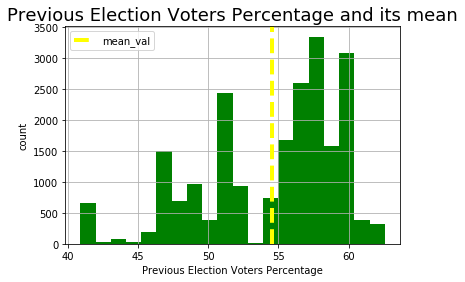

In [25]:
#Checking the Distribution of Previous election Voters Percentage and its mean

null_votes = df['pre.votersPercentage'].hist(bins=20, color='green')
mean_val = np.mean(df['pre.votersPercentage'])
plt.axvline(mean_val,linewidth=4,  color='yellow', label='mean_val',linestyle='dashed')
plt.title('Previous Election Voters Percentage and its mean',fontsize=18)
plt.xlabel('Previous Election Voters Percentage')
plt.ylabel('count')
plt.legend()
plt.show()

Observation:
    
    From the above six graph it is clearly shown that in previous year election voters percentage and its mean is high
    than 2019 election and number of null votes and blank votes is also low as compare to 2019 election.

### Checking the correlation between null votes,blank votes and voters percentage of 2019 election and previous election. 

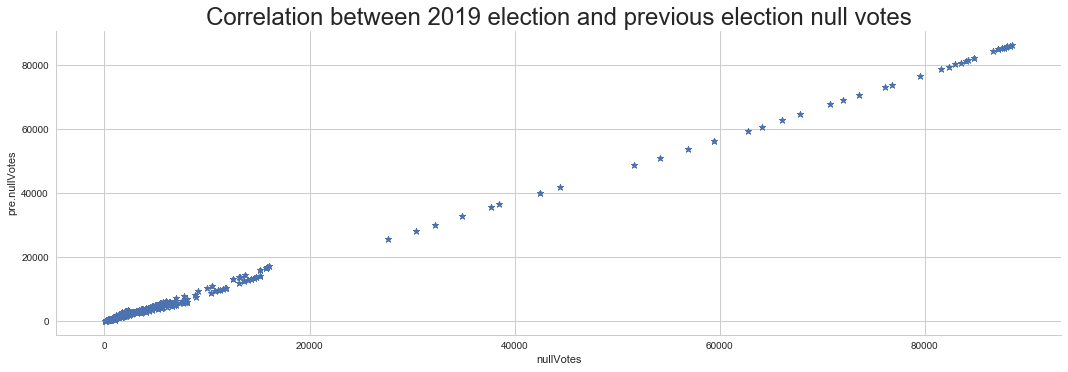

In [26]:
#Correlation between Total case vs total death.
sns.set(style='whitegrid')
sns.lmplot(x='nullVotes',y='pre.nullVotes',data=df,markers=['*'],aspect=3,fit_reg=False)
plt.title('Correlation between 2019 election and previous election null votes',fontsize=24)
plt.show()

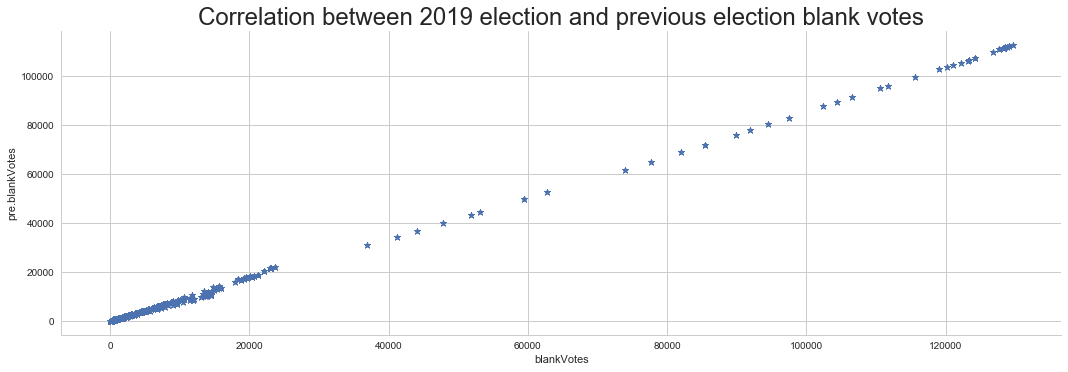

In [27]:
#Correlation between Total case vs total death.
sns.set(style='whitegrid')
sns.lmplot(x='blankVotes',y='pre.blankVotes',data=df,markers=['*'],aspect=3,fit_reg=False)
plt.title('Correlation between 2019 election and previous election blank votes',fontsize=24)
plt.show()

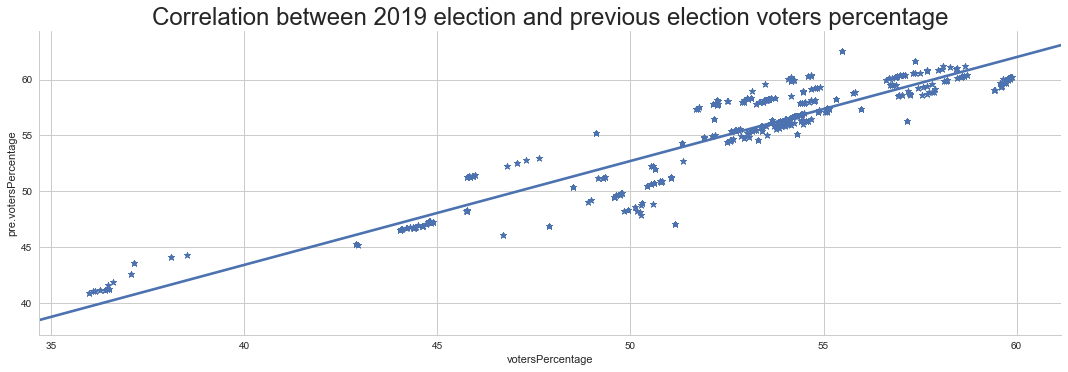

In [28]:
#Correlation between Total case vs total death.
sns.set(style='whitegrid')
sns.lmplot(x='votersPercentage',y='pre.votersPercentage',data=df,markers=['*'],aspect=3)
plt.title('Correlation between 2019 election and previous election voters percentage',fontsize=24)
plt.show()

Observation:
    
    1-The observation shows that there are approx 2.14% of difference between null votes of 2019 election and previous     
      election.In 2019 election null votes are high.
        
    2-The observation shows that there are approx 0.24% of difference between blank votes of 2019 election and previous
      election.In 2019 election blank votes are high.
        
    3-The observation shows that there are approx 3% of difference between voters percentage of 2019 election and
      previous election.In 2019 election voters percentage is low than previous election.
        
Findings:
    
    The results shows that people are not very much intrested in giving their votes as compare to previous election.
    Because in 2019 election the total votes percentage is only around 60% which is 3% low as compare to previous 
    election.

## Now we see some data i.e. types of votes w.r.t party using pivot table

In [29]:
#Checking the null votes percentage according to party.
pd.pivot_table(df,index='Party',values='nullVotesPercentage').sort_values('nullVotesPercentage',ascending=False)

,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
PS,1.965741
PPD/PSD,1.965741
PNR,1.965741
PDR,1.965741
PCTP/MRPP,1.965741


In [30]:
#Checking the blank votes percentage according to party.
pd.pivot_table(df,index='Party',values='blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


In [31]:
#Checking the valid votes percentage according to party.
pd.pivot_table(df,index='Party',values='validVotesPercentage').sort_values('validVotesPercentage',ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


Findings:
    
    1-PS party has the most number of valid votes and MAS party has the least number of valid votes.
    2-MAS party has the most number of blank votes and NC party has the least number of blank votes.
    3-RIR party has the most number of null votes and MAS party has the least number of null votes.

In [32]:
#Checking the number of final Mandates according to Territory.
pd.pivot_table(df,index='territoryName',values='FinalMandates',aggfunc='count').sort_values('FinalMandates',ascending=False)

,FinalMandates
territoryName,
Leiria,1134
Braga,1134
Território Nacional,1134
Porto,1134
Aveiro,1080
Viseu,1080
Viana do Castelo,1080
Setúbal,1080
Madeira,1080


In [33]:
#Checking the most number of final Mandates according to party.
pd.pivot_table(df,index='Party',values='FinalMandates',aggfunc=np.mean).sort_values('FinalMandates',ascending=False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


Findings:
    
    In this election top three dominant parties by finalmandates are:
        
        1-PS
        2-PPD/PSD
        3-B.E

# Checking skewness

### To Check the distribution of Skewness

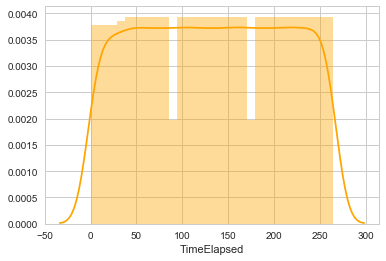

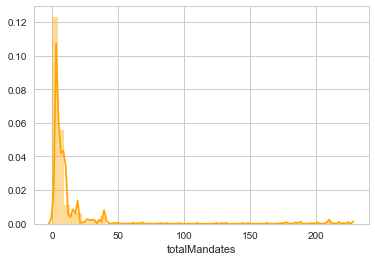

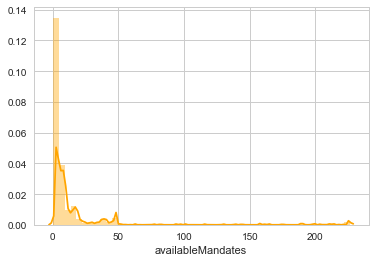

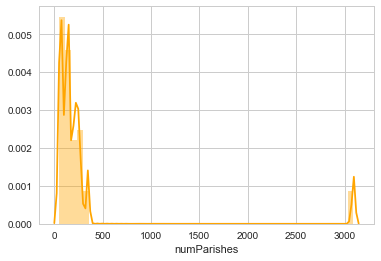

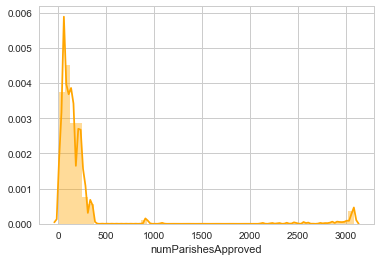

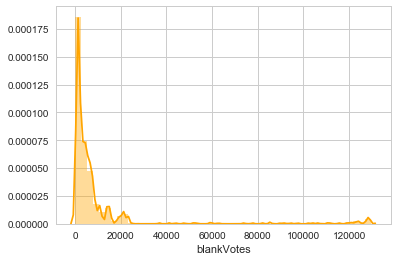

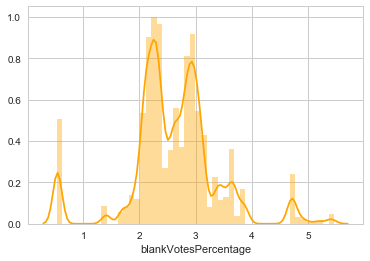

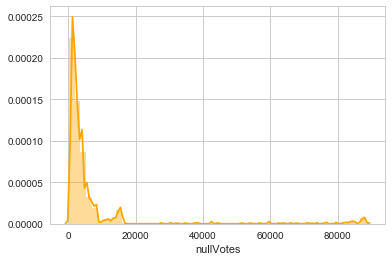

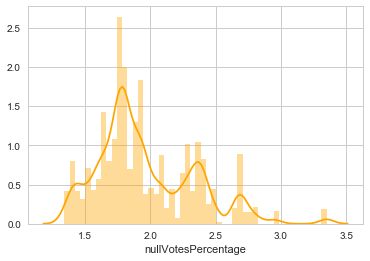

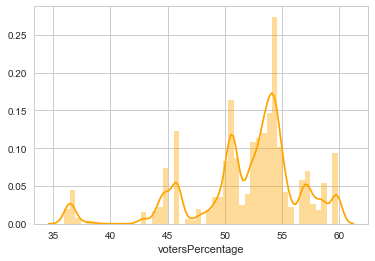

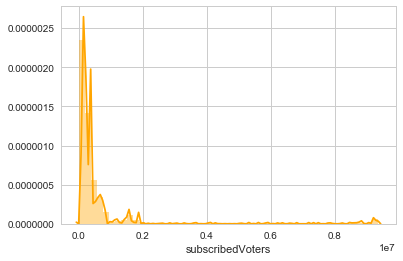

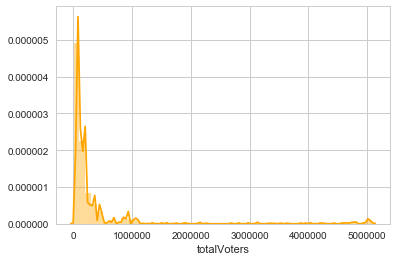

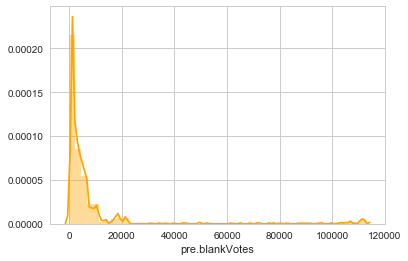

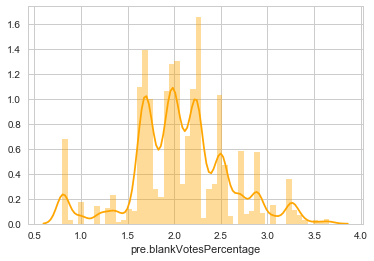

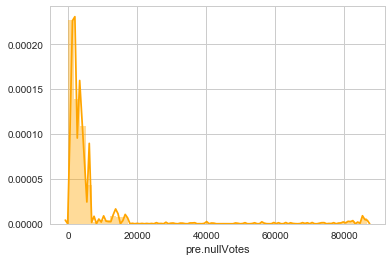

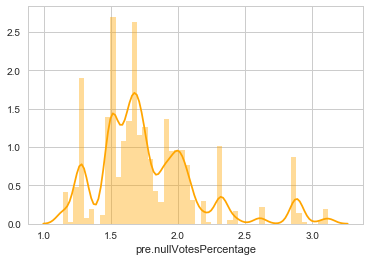

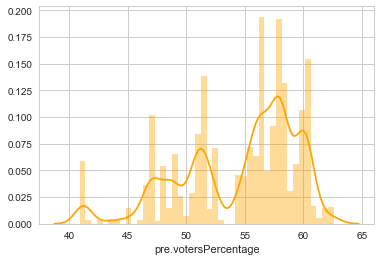

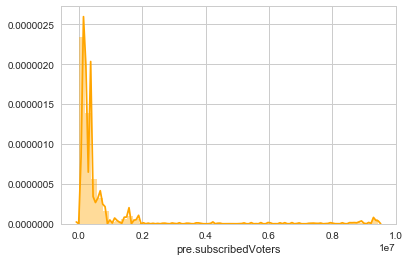

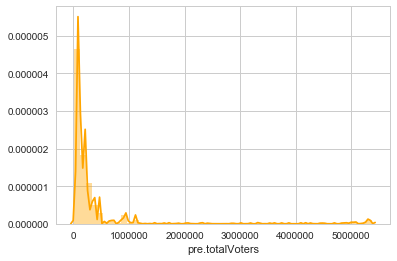

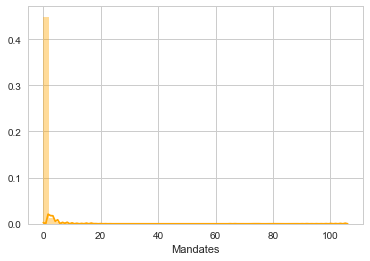

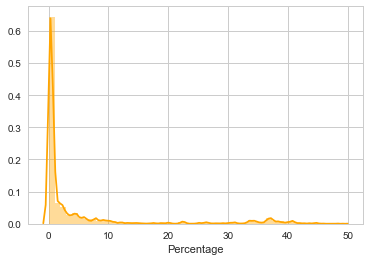

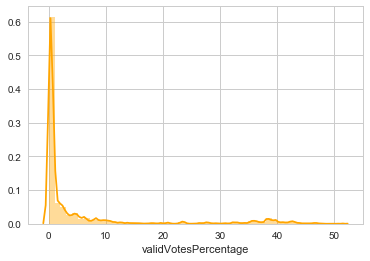

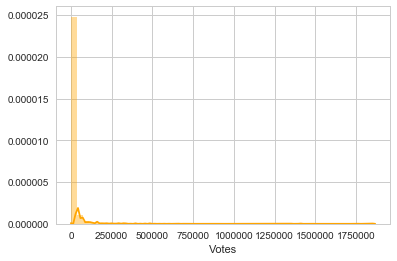

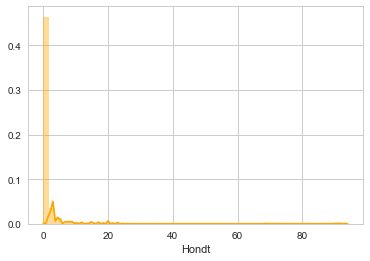

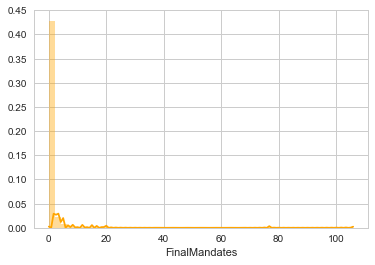

In [34]:
for col in df.describe().columns:
    sns.distplot(df[col],color='orange')
    plt.show()

In [35]:
#Lets check the skewness in the dataset
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

TimeElapsed                 -0.005496
totalMandates                5.150031
availableMandates            5.131572
numParishes                  3.920433
numParishesApproved          4.238343
blankVotes                   4.521940
blankVotesPercentage         0.069627
nullVotes                    4.520945
nullVotesPercentage          0.855419
votersPercentage            -1.158029
subscribedVoters             4.568797
totalVoters                  4.541364
pre.blankVotes               4.551489
pre.blankVotesPercentage     0.021609
pre.nullVotes                4.563235
pre.nullVotesPercentage      1.231109
pre.votersPercentage        -0.779289
pre.subscribedVoters         4.565085
pre.totalVoters              4.548030
Mandates                    16.576658
Percentage                   2.542328
validVotesPercentage         2.543122
Votes                       13.940573
Hondt                       11.489315
FinalMandates               12.402865
dtype: float64
Total count of numeric features:  2

In [36]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [37]:
#Lets again check the skewness
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

TimeElapsed                -0.005496
totalMandates               0.673353
availableMandates           0.739482
numParishes                 1.724389
numParishesApproved         0.363008
blankVotes                 -0.132151
blankVotesPercentage        0.069627
nullVotes                  -0.033397
nullVotesPercentage         0.545046
votersPercentage           -0.800754
subscribedVoters            0.019051
totalVoters                 0.091477
pre.blankVotes             -0.043120
pre.blankVotesPercentage    0.021609
pre.nullVotes              -0.019415
pre.nullVotesPercentage     0.786357
pre.votersPercentage       -0.610743
pre.subscribedVoters        0.021921
pre.totalVoters             0.094050
Mandates                    4.368206
Percentage                  1.416849
validVotesPercentage        1.404150
Votes                       0.367201
Hondt                       3.093717
FinalMandates               3.196053
dtype: float64
Total count of numeric features:  25
count of features which

## Encoding Categorical Variables

In [38]:
#Extracting the Dates and Time from the time column
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time

In [39]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,2019-10-06 20:10:02,Território Nacional,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,PS,0.0,3.670970,3.718924,11.904927,4.553877,4.672829,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,PPD/PSD,0.0,3.534562,3.582129,11.764656,4.406719,4.356709,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,B.E.,0.0,2.055405,2.098018,10.177628,2.833213,2.995732,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,CDS-PP,0.0,1.774952,1.814825,9.848186,2.564949,1.791759,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,PCP-PEV,0.0,1.720979,1.763017,9.784591,2.484907,2.564949,2019-10-06,20:10:02


In [40]:
#Before converting the data drop time column
df.drop(['time'],axis=1,inplace=True)

In [41]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [42]:
df.head(2)

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,16,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,17,0.0,3.670970,3.718924,11.904927,4.553877,4.672829,0,8
1,0,16,0.0,5.42495,8.036897,6.986566,9.175024,2.5,9.090994,1.193922,2637.8496,13.531196,12.864882,9.026177,1.94,9.008469,1.068153,2773.0756,13.609401,12.968156,15,0.0,3.534562,3.582129,11.764656,4.406719,4.356709,0,8


# Plotting Outliers

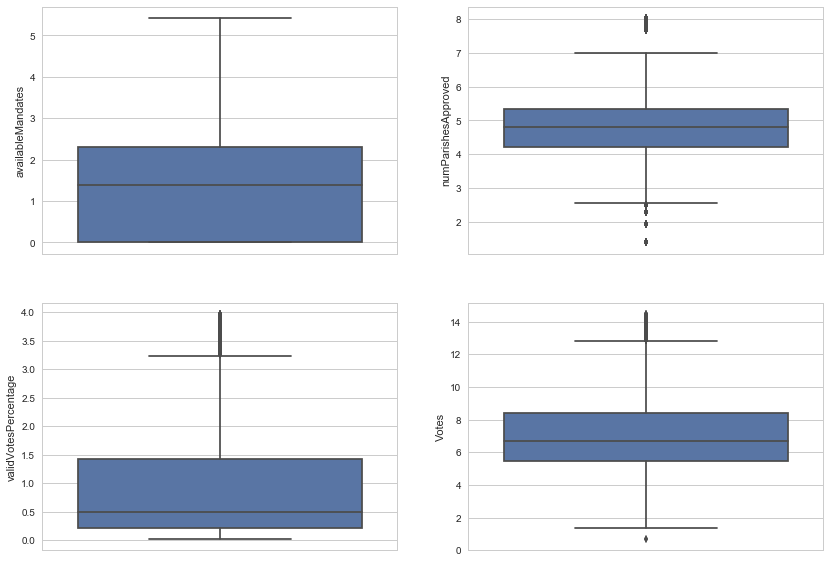

In [43]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'availableMandates', data = df)
sns.boxplot(ax=ax2, y = 'numParishesApproved', data = df)
sns.boxplot(ax=ax3, y = 'validVotesPercentage',  data = df)
sns.boxplot(ax=ax4, y = 'Votes',  data = df)

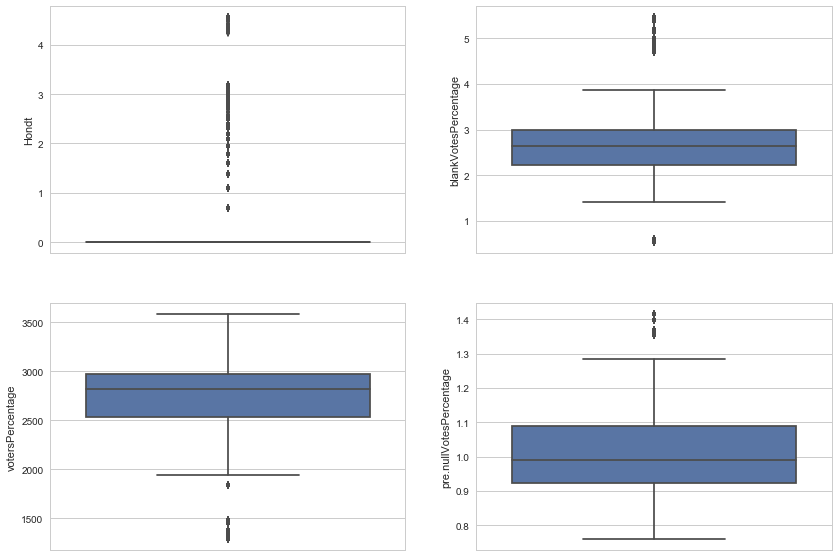

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (14, 10))
sns.boxplot(ax=ax1, y = 'Hondt', data = df)
sns.boxplot(ax=ax2, y = 'blankVotesPercentage', data = df)
sns.boxplot(ax=ax3, y = 'votersPercentage',  data = df)
sns.boxplot(ax=ax4, y = 'pre.nullVotesPercentage',  data = df)

Findings:
    
    After plotting the outliers we can clearly see that there are outliers present in our dataset which needs to be 
    removed.

# Removing Outliers

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.71470808, 0.98296816, 1.29254307, ..., 6.82439402, 0.41837381,
        1.19248297],
       [1.71470808, 0.98296816, 1.29254307, ..., 6.33613766, 0.41837381,
        1.19248297],
       [1.71470808, 0.98296816, 1.29254307, ..., 4.23407055, 0.41837381,
        1.19248297],
       ...,
       [1.69806785, 1.48421407, 0.52126036, ..., 0.39292338, 2.39020696,
        1.25664593],
       [1.69806785, 1.48421407, 0.52126036, ..., 0.39292338, 2.39020696,
        1.25664593],
       [1.69806785, 1.48421407, 0.52126036, ..., 0.39292338, 2.39020696,
        1.25664593]])

In [46]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 21567, 21623, 21624], dtype=int64), array([ 4, 25, 26, ..., 26, 21, 21], dtype=int64))


In [47]:
df_new=df[(z<3).all(axis=1)]

In [48]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(21643, 29) 		 (19171, 29)


In [49]:
df=df_new
df.shape

(19171, 29)

#### Now all the outliers are removed and our data is clean.

# Model Training

In [50]:
df.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
21,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,15,0.0,3.657131,3.702042,7.785721,2.079442,1.945910,0,8
22,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,17,0.0,3.564732,3.609566,7.690743,2.079442,2.079442,0,8
23,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,1,0.0,2.136531,2.177022,6.167516,0.693147,1.098612,0,8
24,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,2,0.0,1.965713,2.005526,5.971262,0.693147,0.693147,0,8
25,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,11,0.0,1.220830,1.252763,5.030438,0.000000,0.000000,0,8


In [51]:
#Splitting the data into input and output variable.
x=df.drop(columns=['FinalMandates'],axis=1)
x.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Dates,Time
21,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,15,0.0,3.657131,3.702042,7.785721,2.079442,0,8
22,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,17,0.0,3.564732,3.609566,7.690743,2.079442,0,8
23,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,1,0.0,2.136531,2.177022,6.167516,0.693147,0,8
24,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,2,0.0,1.965713,2.005526,5.971262,0.693147,0,8
25,0,0,0.0,2.833213,4.997212,2.564949,5.231109,2.92,4.624973,0.951658,2840.89,9.388821,8.759669,4.828314,1.82,4.718499,0.966984,2976.7936,9.434443,8.828641,11,0.0,1.220830,1.252763,5.030438,0.000000,0,8


In [52]:
y=df['FinalMandates']
y.head()

21    1.945910
22    2.079442
23    1.098612
24    0.693147
25    0.000000
Name: FinalMandates, dtype: float64

In [53]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(19171, 28) 		 (19171,)


In [54]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [55]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42,stratify=y)

In [56]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(14378, 28) 		 (4793, 28)


In [57]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(14378,) 	 (4793,)


In [58]:
#Importing all the model Library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [59]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.9778800913524632
MAE: 0.01834745831507988
MSE: 0.004203084395018052
RMSE: 0.06483119924093686
R2_score: 0.9741556057442466
*****************************************************************************************


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.9738292469583217
MAE: 0.04769489781102072
MSE: 0.004557656570938927
RMSE: 0.0675104182399941
R2_score: 0.9719753727902091
*****************************************************************************************


Score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='bes

In [60]:
# Cross Validate All Algorithm by using for loop
from sklearn.model_selection import cross_val_score

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: [0.93256705 0.92895478 0.94764333 0.95888207 0.97409407 0.98059687
 0.99481936 0.99888366 0.99932846 0.99926378 0.99937574 0.99926163
 0.99927674 0.99918597 0.99923709]
Mean Score: 0.9807580394719841
Standard deviation: 0.025235048763889836
************************************************************************************************


Model: SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Score: [0.94921907 0.94866655 0.95558049 0.96333844 0.97487562 0.97824222
 0.98466938 0.98476045 0.98661563 0.98515529 0.98541425 0.98233393
 0.97183125 0.97545668 0.97460814]
Mean Score: 0.9733844919392652
Standard deviation: 0.012759460999043652
************************************************************************************************


Model: DecisionTreeRegressor(criterion='mse', max_depth=None, max_fea

From above code SVC, DecissionTree, KNeighbors, Ridge, RandomForest,GradientBoosting,ExtraTrees and BaggingRegressorgives
the best score so we use GridSearchCV to find out the best parameters and the find the best model.

## Using GridSearchCV to find out best parameter

In [61]:
#Using GridSearchCV to find out the best parameters in RandomForestRegressor

parameters={'n_estimators':[10,50,100,200]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 10}


In [62]:
#Using GridSearchCV to find out the best parameter in GradientBoostingRegressor

parameters={'n_estimators':[10,100,200,300]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 300}


In [63]:
#Using GridSearchCV to find out the best parameter in BaggingRegressor

parameters={'n_estimators':[10,50,100,200]}
br=BaggingRegressor()

clf=GridSearchCV(br,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 100}


In [64]:
#Using GridSearchCV to find out the best parameters in ExtraTreesRegressor

parameters={'n_estimators':[10,50,100,200]}
etr=ExtraTreesRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 50}


## Applying the results in models

In [65]:
LR=LinearRegression()

KNN=KNeighborsRegressor(algorithm='auto',n_neighbors=15,weights='uniform')

DT=DecisionTreeRegressor(criterion='friedman_mse', random_state=55)

SVR=SVR(kernel='linear',C=1)

Ridge=Ridge(alpha=5,random_state=49,solver='sag')

RF=RandomForestRegressor(n_estimators=10,criterion='mse')

GB=GradientBoostingRegressor(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=100, max_depth=4)

Bagg=BaggingRegressor(n_estimators=200, max_features=1.0, max_samples=1.0, random_state=54)

ETR=ExtraTreesRegressor(n_estimators=100)

In [66]:
models=[]
models.append(('LinearTrgression',LR))
models.append(('KNeighborsRegressor',KNN))
models.append(('DecisionTreeRegressor',DT))
models.append(('SupportVectorRegressor',SVR))
models.append(('Ridge',Ridge))
models.append(('RandomForestRegressor',RF))
models.append(('GradientBoostingRegressor',GB))
models.append(('BaggingRegressor',Bagg))
models.append(('ExtraTreesRegressor',ETR))

In [67]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score * 100)
    print('\n')
    
    pred=model.predict(x_test)
    print('\n')
    
    #R2_score
    r_score=r2_score(y_test,pred)
    print('R2_score:',r_score)
    R2_Score.append(r_score * 100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val * 100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')

****************** LinearTrgression *****************************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Score: 0.9778800913524632




R2_score: 0.9741556057442466


Cross Val Score: 0.9807580394719841


MAE: 0.01834745831507988


MSE: 0.004203084395018052


RMSE: 0.06483119924093686



****************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')
Score: 0.976849961342381




R2_score: 0.9698008228536218


Cross Val Score: 0.9759740576513727


MAE: 0.01796062033512798


MSE: 0.004911304515410404


RMSE: 0.07008070002083601



****************** DecisionTreeRegressor *****************************


DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
      

In [68]:
#Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_Val_Score':CVS,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_Val_Score,MAE,MSE,RMSE
0,LinearTrgression,97.788009,97.415561,98.075804,0.018347,0.004203,0.064831
1,KNeighborsRegressor,97.684996,96.980082,97.597406,0.017961,0.004911,0.070081
2,DecisionTreeRegressor,100.000000,99.801068,99.776503,0.000565,0.000324,0.017987
3,SupportVectorRegressor,96.604737,96.294094,96.905544,0.050492,0.006027,0.077633
4,Ridge,97.776457,97.403868,98.066086,0.018034,0.004222,0.064978
5,RandomForestRegressor,99.979814,99.848462,99.852115,0.000902,0.000246,0.015699
6,GradientBoostingRegressor,99.887958,99.705742,99.765767,0.003753,0.000479,0.021876
7,BaggingRegressor,99.986186,99.856618,99.870936,0.000831,0.000233,0.015270
8,ExtraTreesRegressor,100.000000,99.950441,99.891373,0.000397,0.000081,0.008978


### From this tabel we can clearly see all the models with its result. We can choose the model which gives best result.

## I Choose ExtraTreesRegressor as my final model.

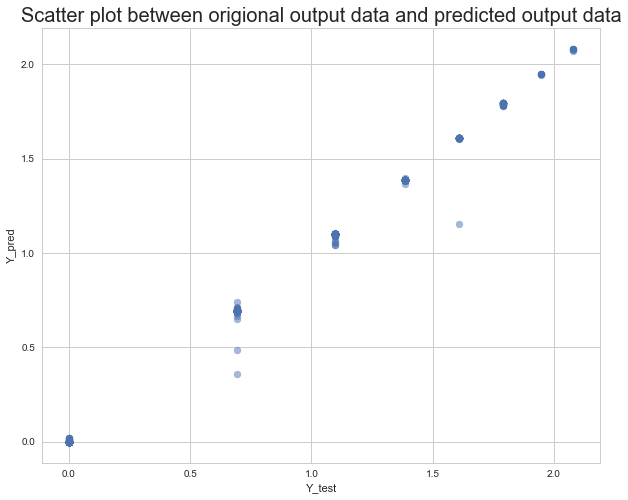

In [69]:
#Scatter plot between origional output data and predicted output data for ExtraTreesRegressor
plt.figure(figsize=(10,8))
plt.scatter(y_test, ETR.predict(x_test), alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between origional output data and predicted output data",fontsize=20)
plt.show()

In [70]:
#Saving the model
#Importing joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(ETR,'Portugal_Election_2019_etr.pkl')

['Portugal_Election_2019_etr.pkl']